<a href="https://colab.research.google.com/github/suian888/Data-Analysis-with-Python/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
df = pd.read_csv('wine.csv')
df

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,Barbera,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,Barbera,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,Barbera,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,Barbera,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
dtypes: float64(11), int64(3

In [5]:
print(df['class_name'].value_counts())

class_name
Grignolino    71
Barolo        59
Barbera       48
Name: count, dtype: int64


**class_label**: discrete numbers, showing the categories of wine

## the chemical and sensory properties of the wine (x)

**alcohol**: Alcohol content in the wine (%).

**malic_acid**: Concentration of malic acid, influencing tartness and sharpness in taste.

**ash**: Measurement related to the ash content of the wine, representing mineral residue.

**alcalinity_of_ash**: Alkalinity level of the ash, a marker of mineral properties.

**magnesium**: Magnesium concentration, which affects chemical stability and flavor.

**total_phenols**: Total phenol content, influencing antioxidant properties and taste.

**flavanoids**: Flavonoid content, a subclass of phenols affecting taste and mouthfeel.

**nonflavanoid_phenols**: Phenols that are not flavonoids, contributing to overall phenol content.

**proanthocyanins**: Proanthocyanin levels, influencing bitterness and astringency.

**color_intensity**: Intensity of the wine's color.

**hue**: A measure of the wine's color tone (red vs. yellow components).

**od280**: Ratio of absorbance at 280 nm, related to wine's protein and phenol content.

**proline**: Proline concentration, an amino acid affecting flavor and aroma.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
x = df.drop(['class_label', 'class_name'], axis=1)
y = df['class_label']
# y is categorical value
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=10)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=df['class_label'])

stratify: keep the proportion of different types (Barolo, Grignolino, Barbera) the same

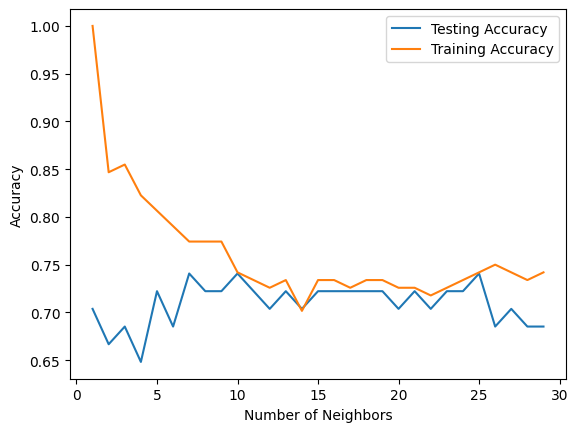

In [8]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train, y_train)
  train_accuracy[i] = knn_model.score(x_train, y_train)
  test_accuracy[i] = knn_model.score(x_test, y_test)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

At **n_neighbors = 10**, the testing accuracy and the training accuracy are almost the same.

In [9]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

array([1, 2, 1, 1, 1, 1, 2, 3, 2, 3, 2, 3, 3, 2, 1, 3, 2, 1, 1, 3, 2, 1,
       3, 3, 3, 3, 1, 3, 1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1,
       1, 2, 2, 1, 3, 3, 2, 2, 2, 1])

In [10]:
knn.score(x_test, y_test)

0.7407407407407407

In [11]:
knn.score(x_train, y_train)

0.7419354838709677

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [13]:
dtc.score(x_test, y_test)

0.9259259259259259

In [14]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file='tree.dot', rounded=True, filled=True)

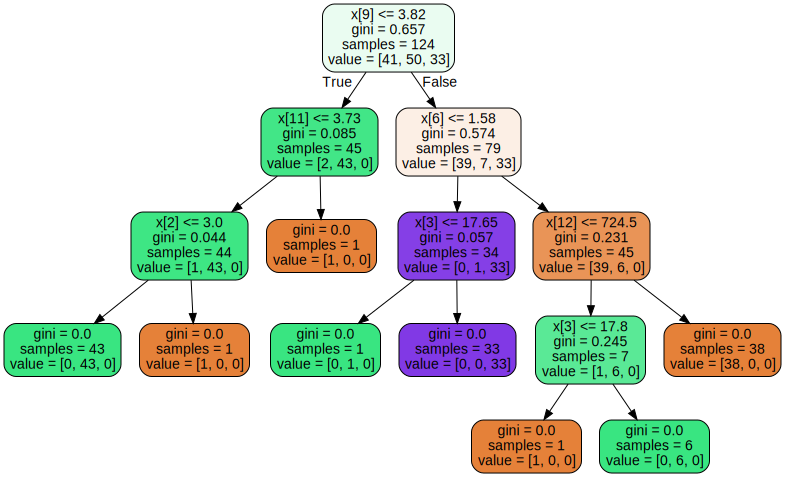

In [15]:
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42, oob_score=True)
rf.fit(x_train, y_train)
print(f"OOB Score: {rf.oob_score_:.4f}")

OOB Score: 0.8710


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9630
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94        18
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54

Confusion Matrix:
 [[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]


In [18]:
train_accuracy = accuracy_score(y_train, rf.predict(x_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9630


In [19]:
importances = rf.feature_importances_

In [20]:
indices2= np.argsort(importances)
indices2

array([ 3,  7,  2,  8,  1,  5, 12, 11,  9,  4,  0, 10,  6])

In [21]:
indices = np.argsort(importances)[::-1]
indices

array([ 6, 10,  0,  4,  9, 11, 12,  5,  1,  8,  2,  7,  3])

In [22]:
importances[indices]

array([0.27048422, 0.14404948, 0.13904712, 0.10582456, 0.09521495,
       0.07737182, 0.05595971, 0.04661781, 0.0257427 , 0.01826678,
       0.01384931, 0.00524149, 0.00233003])

In [23]:
features = x.columns
features[indices]

Index(['flavanoids', 'hue', 'alcohol', 'magnesium', 'color_intensity', 'od280',
       'proline', 'total_phenols', 'malic_acid', 'proanthocyanins', 'ash',
       'nonflavanoid_phenols', 'alcalinity_of_ash'],
      dtype='object')

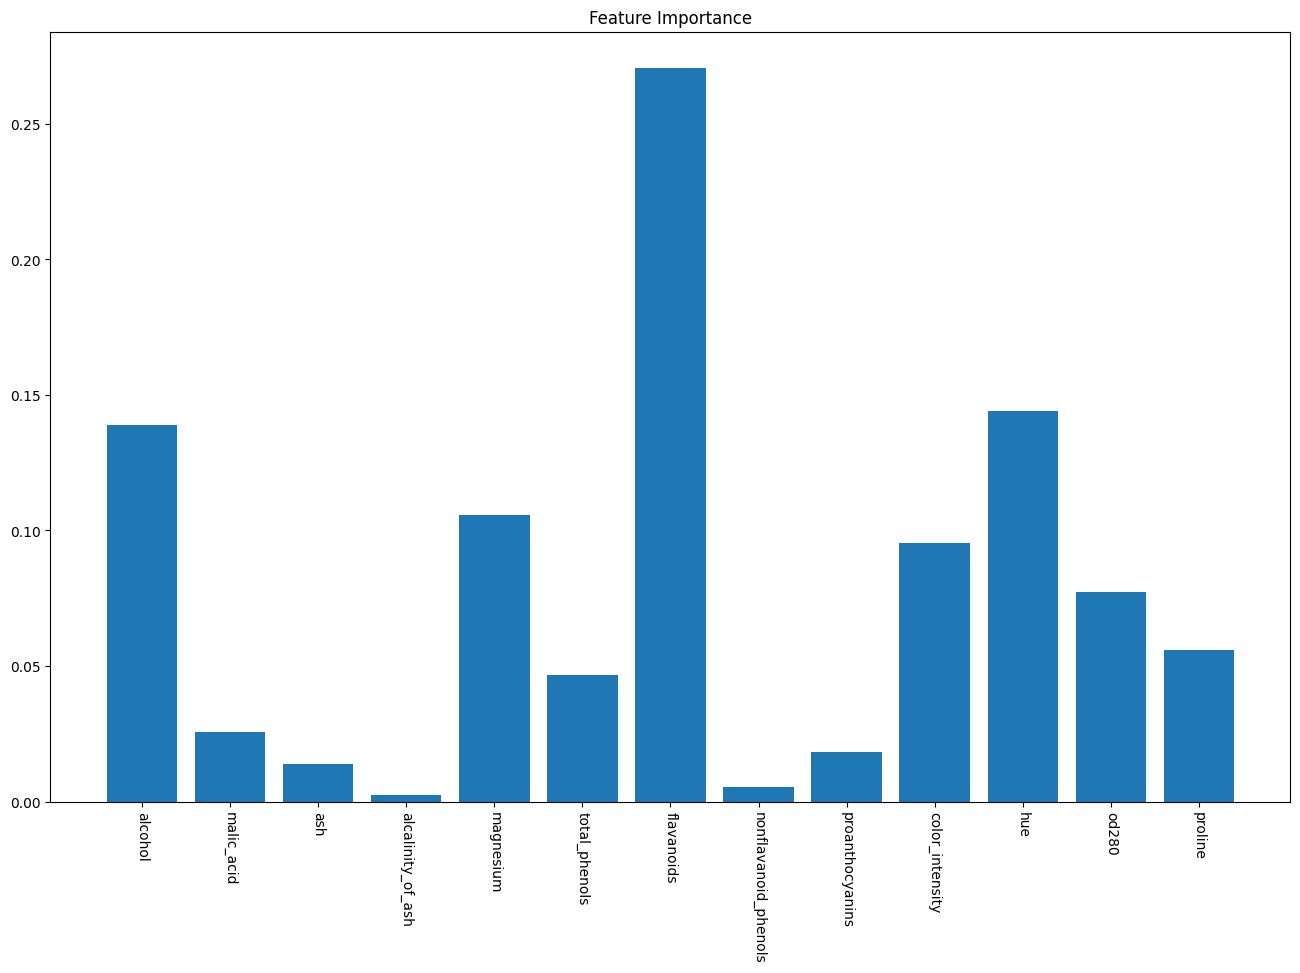

In [24]:
plt.figure(figsize=(16,10))
plt.title('Feature Importance')
plt.bar(features,importances)
plt.xticks(rotation=-90)
plt.show()

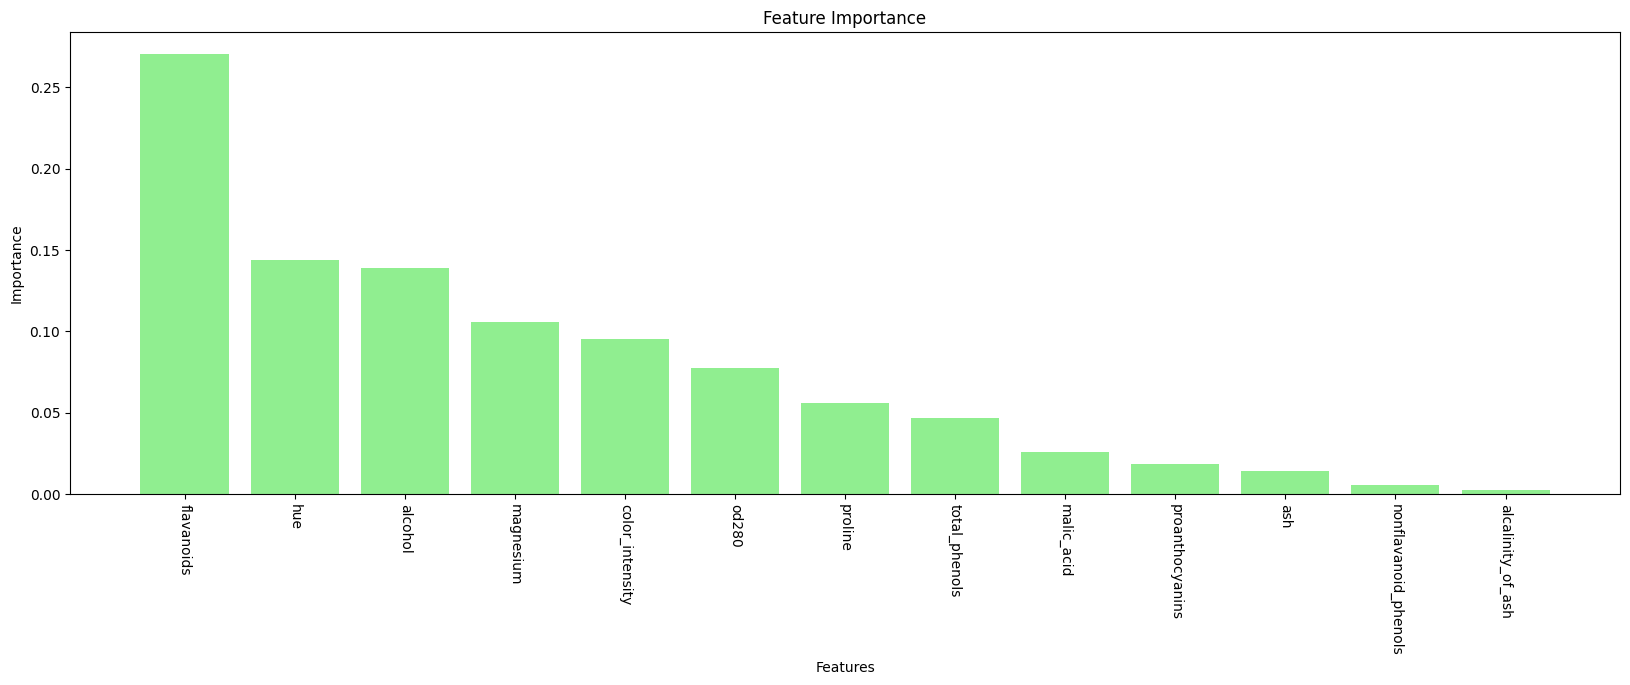

In [25]:
plt.figure(figsize=(20,6))
plt.title('Feature Importance')
plt.bar(x.columns[indices], importances[indices], color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=-90)
plt.show()

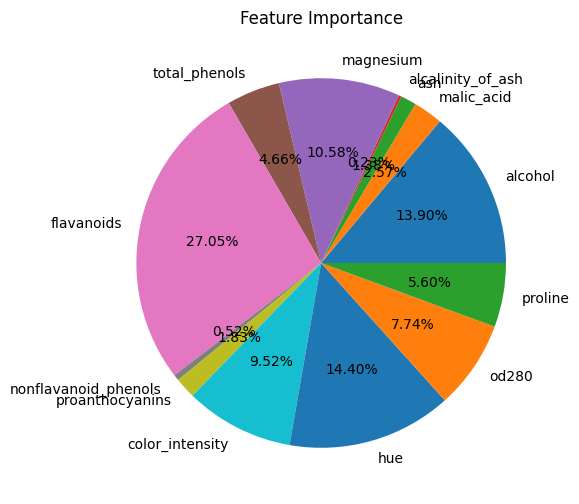

In [26]:
plt.figure(figsize=(20,6))
plt.title('Feature Importance')
plt.pie(importances, labels=features, autopct='%2.2f%%')
plt.show()